### 로지스틱 회귀

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [3]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [4]:
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [5]:
fish_target = fish['Species'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [9]:
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [10]:
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [11]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

#proba는 클래스별에 해당하는 확률을 표시함

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [12]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


### 로지스틱회귀

로지스틱 회귀는 분류 알고리즘으로 선형 방정식을 사용하며 시그모이드 함수나 소프트맥스함수를 사용하여 클래스 예측을 함

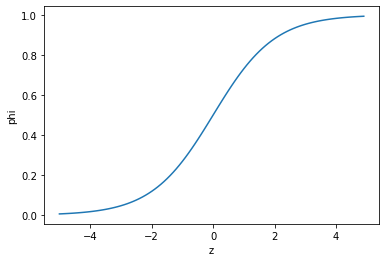

In [13]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

시그모이드 함수로 선형방정식의 출력을 0과 1사이의 값으로 압축하여 이진분류를위해 사용한다.

In [14]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
char_arr[[True, False, True, False, False]]

array(['A', 'C'], dtype='<U1')

boolean indexing : 넘파이 배열은 True , False 값을 전달하여 행을 선택할수 있으며 이를 불린 인덱싱이라고 부름

In [15]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [17]:
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [18]:
lr.predict_proba(train_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [19]:
lr.classes_ # 사이킷런은 타깃값을 알파벳 순으로정렬하기때문에 Bream 은0 음성클래스 Smelt 는 1양성클래스이다.

array(['Bream', 'Smelt'], dtype=object)

In [20]:
lr.coef_, lr.intercept_

(array([[-0.4037798 , -0.57620209, -0.66280298, -1.01290277, -0.73168947]]),
 array([-2.16155132]))

In [21]:
decisions = lr.decision_function(train_bream_smelt[:5]) # decision function 은 모델이 학습한 선형 방정식의 출력을 반환한다 
decisions

array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ])

In [22]:
from scipy.special import expit # 파이썬 시그모이드 라이브러리

print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [23]:
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.8067226890756303
0.85


In [24]:
proba = lr.predict_proba(test_scaled[:5])
np.round(proba, decimals=3)

array([[0.004, 0.092, 0.545, 0.008, 0.281, 0.061, 0.01 ],
       [0.   , 0.061, 0.126, 0.002, 0.087, 0.722, 0.001],
       [0.009, 0.009, 0.223, 0.569, 0.17 , 0.006, 0.013],
       [0.061, 0.077, 0.526, 0.036, 0.257, 0.003, 0.04 ],
       [0.004, 0.03 , 0.664, 0.026, 0.245, 0.018, 0.013]])

In [25]:
lr.coef_.shape, lr.intercept_.shape

((7, 5), (7,))

소프트맥스 함수는 다중분류에서 여러 선형방정식의 출력결과를 정규화하여 합이 1 한다.

In [26]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[-2.35  0.75  2.54 -1.67  1.87  0.35 -1.49]
 [-4.17  1.38  2.11 -2.    1.73  3.85 -2.9 ]
 [-1.44 -1.48  1.73  2.66  1.46 -1.83 -1.09]
 [ 0.02  0.26  2.18 -0.52  1.46 -3.   -0.39]
 [-2.22 -0.27  2.84 -0.4   1.84 -0.74 -1.06]]


In [27]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))
# 결과에서 보이는 것처럼 출력의 결과의 합을 1이되도록 만드는 것이 소프트맥스이다

[[0.004 0.092 0.545 0.008 0.281 0.061 0.01 ]
 [0.    0.061 0.126 0.002 0.087 0.722 0.001]
 [0.009 0.009 0.223 0.569 0.17  0.006 0.013]
 [0.061 0.077 0.526 0.036 0.257 0.003 0.04 ]
 [0.004 0.03  0.664 0.026 0.245 0.018 0.013]]


### 확률적 경사하강법

확률적 경사하강법이란 훈련세트에서 샘플을 추출해 손실함수의 경사를 따라 최적의 모델을 찾는 알고리즘이다. 이때 손실함수는 loss function = cost function 이라고도하며 경사하강법에서 최적화 해야할 대상이다. 알고리즘의 훈련이 얼마나 잘못되었는지 측정하는 기준이라고 볼수있다. 또한 각 샘플의 특성마다 손실함수적용법이 다른데 이진분류는 이진 크로스엔트로피(=로지스틱 손실함수) 다중 분류에는 크로스엔트로피손실함수 회귀문제에는 편균 제곱오차손실함수를사용한다.

로지스틱 손실함수 (이진 크로스엔트로피손실함수): 양성클래스(1)일때의 손실은 예측확률 -log로 계산하며 음성클래스일때는 1-예측확률 -log로 계산한다.

샘플의 양의따라 경사하강법의 명칭이 달라진다고 할수 있는데 확률적 경사하강법은 훈련세트에서 한개씩 꺼냇을때를 의미하며 여러개씩 꺼내면 미니배치 경사하강법 전부다 꺼냇을때는 배치 경사하강법이라고 할 수 있다.

epoch: 훈련세트를 한사이클을 모두 돈다고 표현할 수있으며 한사이클을 돌앗을 때 1epoch을 돌았다고 할 수있다.



In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


C:\Users\keoungchan\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [29]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.825


### Epoch의 과대/과소적합

In [30]:
sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [31]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

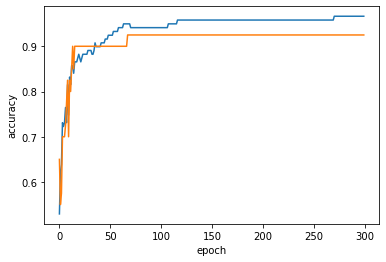

In [32]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [33]:
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8319327731092437
0.775


In [34]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
